# Bike rental

In [1]:
%matplotlib inline

### import neccesery libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

from tqdm import tqdm

### read dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sampleSubmission = pd.read_csv("sampleSubmission.csv")

### explore

In [4]:
set(train.columns) - set(test.columns)

{'casual', 'count', 'registered'}

In [5]:
set(sampleSubmission.columns) - set(test.columns) # sprawdzenie rożnicy w zbiorach

{'count'}

/home/marta/anaconda3/envs/isa/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d82bcda0>,
      dtype=object)

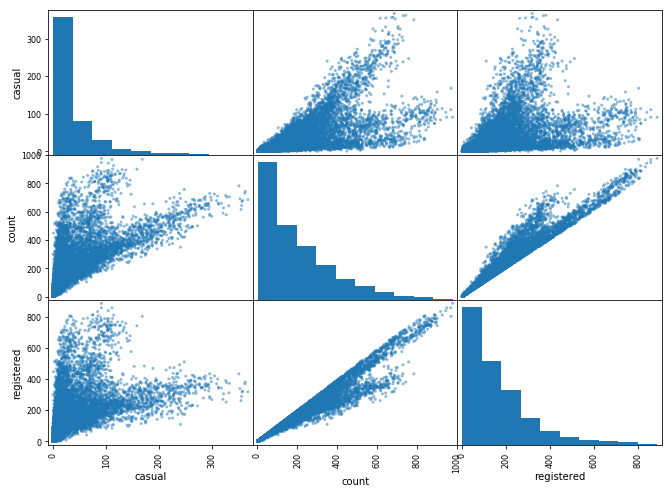

In [6]:
pd.tools.plotting.scatter_matrix(train[["casual", "count", "registered"]], figsize=(11, 8))

In [7]:
(train["count"] == train["registered"] + train["casual"]).value_counts() # czy dane zgadzają sie z opisem czy rownanie się zgadza

True    10886
dtype: int64

In [8]:
numericalColumns = train.describe() # sprawdza numeryczne wartosci. taka sztuczka żeby sprawdzi ci dostac srednie
numericalColumns

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
print(set(train.columns) - set(numericalColumns))
train["datetime"].head()

{'datetime'}


0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

In [10]:
train["datetime"] = pd.to_datetime(train["datetime"]) # dalej object ale juz nie jest stringiem, tylko formatem zblizonym do daty
train["datetime"].describe()

count                   10886
unique                  10886
top       2011-06-09 04:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [11]:
train["dayofweek"]= train["datetime"].dt.dayofweek      #The day of the week with Monday=0, Sunday=6
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

In [12]:
train[["dayofweek", "year", "month", "day", "hour", "minute", "second"]].describe()

,dayofweek,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,3.013963,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,2.004585,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,0.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,1.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,5.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,6.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


In [13]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["dayofweek"] = test["datetime"].dt.dayofweek      #The day of the week with Monday=0, Sunday=6
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

In [14]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,year,month,day,hour,minute,second
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.0,6493.0
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,3.007239,2011.503619,6.565070,25.224550,11.555367,0.0,0.0
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,1.997714,0.500025,3.429462,3.339411,6.912526,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000,2011.000000,1.000000,20.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,1.000000,2011.000000,4.000000,22.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,3.000000,2012.000000,7.000000,25.000000,12.000000,0.0,0.0
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,5.000000,2012.000000,10.000000,28.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,6.000000,2012.000000,12.000000,31.000000,23.000000,0.0,0.0


In [15]:
train = train.drop(["minute", "second"], axis = 1)
test = test.drop(["minute", "second"], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55d7bc8da0>,
      dtype=object)

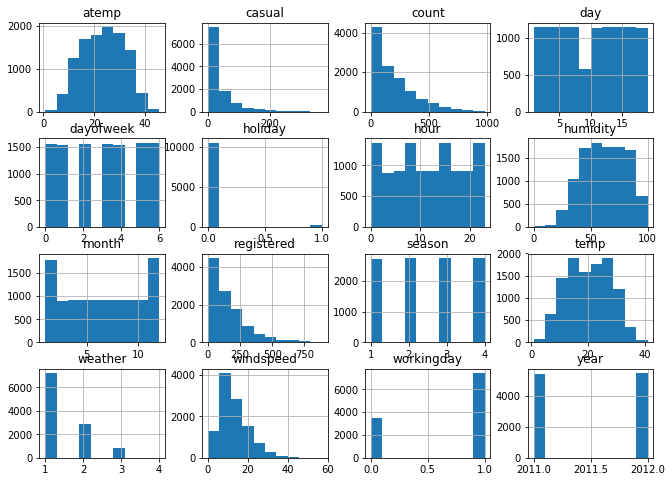

In [16]:
train.hist(figsize=(11, 8))

In [17]:
def plotByFeature (df, feature):
    values_number = df[feature].unique().size
    if values_number <= 10:
        print("Plot for feature {0}:".format(feature))
        for value in df[feature].unique():
            df[df[feature] == value].groupby("hour")["count"].sum().plot(label = value, legend = True, grid = True, title = feature)
        plt.show()
    else:
        print("Feature {0} has too many unique values, skipping!".format(feature))

Feature datetime has too many unique values, skipping!
Plot for feature season:


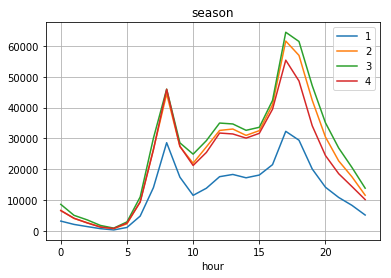

Plot for feature holiday:


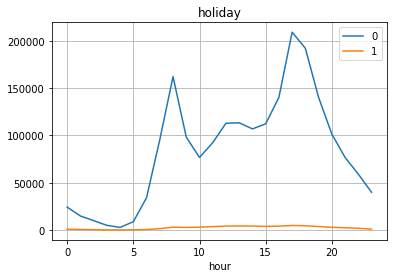

Plot for feature workingday:


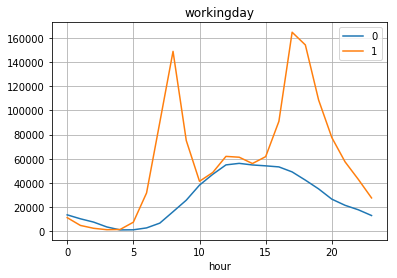

Plot for feature weather:


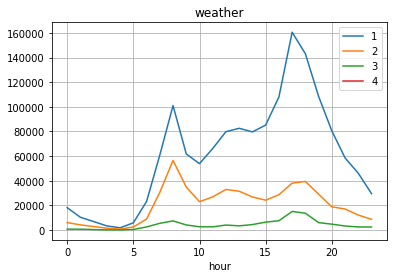

Feature temp has too many unique values, skipping!
Feature atemp has too many unique values, skipping!
Feature humidity has too many unique values, skipping!
Feature windspeed has too many unique values, skipping!
Feature casual has too many unique values, skipping!
Feature registered has too many unique values, skipping!
Feature count has too many unique values, skipping!
Plot for feature dayofweek:


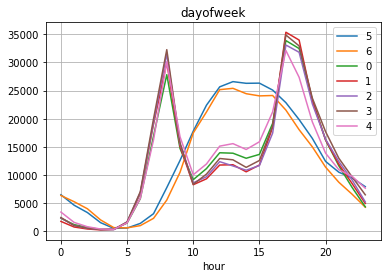

Plot for feature year:


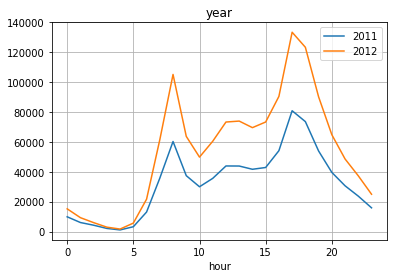

Feature month has too many unique values, skipping!
Feature day has too many unique values, skipping!
Feature hour has too many unique values, skipping!


In [18]:
for feature in train.columns:
         plotByFeature(train, feature)

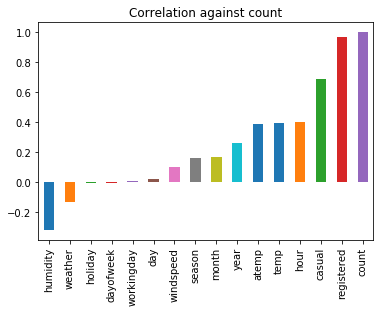

In [19]:
train.corr().sort_values(by="count")["count"].plot(kind = 'bar', title = "Correlation against count")

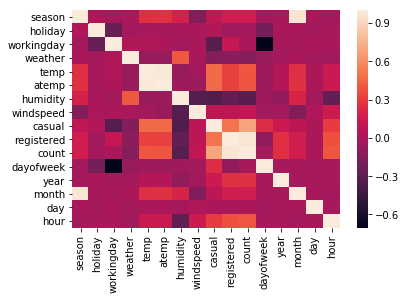

In [20]:
sns.heatmap(train.corr())

In [21]:
train_pca = train.drop(['datetime', 'registered', 'casual', 'count'], 1)

In [22]:
pca  =  PCA().fit(train_pca)
explained = np.cumsum(pca.explained_variance_ratio_)

In [23]:
explained

array([0.57695988, 0.77775071, 0.86629345, 0.92930774, 0.97424038,
       0.99126379, 0.99744546, 0.99885123, 0.99933578, 0.99970536,
       0.99988081, 0.99997498, 1.        ])

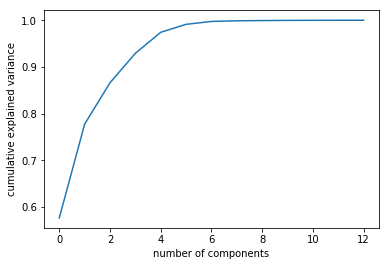

In [24]:
plt.plot(explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Date transformation

In [25]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime"].describe()

count                   10886
unique                  10886
top       2011-06-09 04:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [26]:
def transform_dates(dataframe):
    train["dayofweek"] = train["datetime"].dt.dayofweek      #The day of the week with Monday=0, Sunday=6
    train["year"] = train["datetime"].dt.year
    train["month"] = train["datetime"].dt.month
    train["day"] = train["datetime"].dt.day
    train["hour"] = train["datetime"].dt.hour
    train["minute"] = train["datetime"].dt.minute
    train["second"] = train["datetime"].dt.second
    return dataframe

In [27]:
train = transform_dates(train)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,5,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,5,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,5,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,5,2011,1,1,9,0,0


## set sets

In [28]:
X = train[["season", "holiday", "workingday", "weather","temp","humidity","windspeed"]]
y = train["count"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

# Decision Tree Regressor

#### First of all we will load libraries needed

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
import eli5

Rozpoczynam tworzenie drzewa

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score # ogólna funkcja do CV
from sklearn.model_selection import StratifiedKFold # podział na zbiory do CV

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [33]:
best_score = -np.inf
parameters = {}

In [34]:
for depth in range (10,21):
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            clf = DecisionTreeRegressor(max_depth = depth, min_samples_split = min_split, 
                                             min_samples_leaf = min_leaf)
            scores = cross_val_score(clf, X, y, cv = 5,scoring='neg_mean_squared_error')
            if scores.mean() > best_score:
                #print("New best parameters!")
                parameters["best_depth"] = depth
                parameters["best_min_split"] = min_split
                parameters["best_min_leaf"] = min_leaf
                best_score = scores.mean()
                print("neg_mean_squared_error: {}".format(scores.mean()))
                print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}".format(depth, 
                                                                                         min_split, 
                                                                                         min_leaf, 
                                                                                         ))

neg_mean_squared_error: -35526.99508451391
max_depth: 10, min_samples_split: 2, min_samples_leaf: 1
neg_mean_squared_error: -34076.55663003148
max_depth: 10, min_samples_split: 2, min_samples_leaf: 2
neg_mean_squared_error: -33114.60789644264
max_depth: 10, min_samples_split: 2, min_samples_leaf: 3
neg_mean_squared_error: -32087.471422689618
max_depth: 10, min_samples_split: 2, min_samples_leaf: 4
neg_mean_squared_error: -31567.925884678425
max_depth: 10, min_samples_split: 2, min_samples_leaf: 6
neg_mean_squared_error: -31330.561241411342
max_depth: 10, min_samples_split: 2, min_samples_leaf: 7
neg_mean_squared_error: -30992.92760564063
max_depth: 10, min_samples_split: 2, min_samples_leaf: 8
neg_mean_squared_error: -30619.77546456459
max_depth: 10, min_samples_split: 2, min_samples_leaf: 9
neg_mean_squared_error: -30048.12812720505
max_depth: 10, min_samples_split: 2, min_samples_leaf: 10
neg_mean_squared_error: -30002.53959313885
max_depth: 10, min_samples_split: 2, min_samples_leaf

In [35]:
regressor = DecisionTreeRegressor(max_depth = parameters["best_depth"],
                                  min_samples_split = parameters["best_min_split"],
                                  min_samples_leaf = parameters["best_min_leaf"])

In [36]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y))**2))

rmsle_score = make_scorer(rmsle, greater_is_better = False)

In [37]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
X_test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed
3133,3,0,1,1,33.62,59,0.0000
5786,1,1,0,1,4.10,54,6.0032
5224,4,0,0,1,9.84,48,12.9980
8953,3,0,1,2,29.52,62,12.9980
8054,2,0,1,1,25.42,53,16.9979


In [39]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed
1101,1,0,1,3,17.22,0,15.0013
4194,4,0,1,1,21.32,59,7.0015
10389,4,0,0,1,11.48,81,12.9980
6969,2,0,0,1,25.42,22,19.9995
313,1,0,1,1,9.02,37,26.0027


In [40]:
predicted = regressor.predict(X_test)

In [41]:
eli5.explain_weights(regressor, feature_names=X_train.columns.values)

Weight,Feature
0.4946,temp
0.3195,humidity
0.0781,season
0.0480,windspeed
0.0396,workingday
0.0201,weather
0,holiday


In [42]:
sampleSubmission = transform_dates(sampleSubmission)
sampleSubmission = sampleSubmission.drop(["datetime"], axis = 1)

In [43]:
predicted = regressor.predict(X_test) #robimy predyckję
wyniki = pd.DataFrame(y_test) 
wyniki["y_pred"] = predicted #dokljamy kolumnę z predykcją
wyniki.rename(columns = {"Klasa":"y_test"}, inplace = True)

In [44]:
wyniki

,count,y_pred
3133,127,252.535714
5786,13,18.863636
5224,163,149.781250
8953,233,325.500000
8054,222,221.521127
10044,166,247.185185
5337,144,214.750000
2753,376,414.962963
10127,601,97.760000
33,53,147.956522


In [45]:
wewnetrzny_test  = rmsle(y_pred = wyniki["y_pred"], y = wyniki["count"])
print(wewnetrzny_test)

1.2868888059661268


## Random Forest Regressor

In [46]:
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
#from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor

In [47]:
parameters = {'n_estimators': [20], 'max_features': np.arange(0.1, 1.01, 0.1),
              'bootstrap': [True, False], 'criterion': ["mse"]}
forest = RandomForestRegressor()

In [48]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y))**2))

rmsle_score = make_scorer(rmsle, greater_is_better = False)

In [49]:
regressor = GridSearchCV(estimator = forest, param_grid = parameters, 
                         return_train_score=True, scoring = rmsle_score)

In [50]:
regressor.fit(X = X_train, y = y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20], 'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'bootstrap': [True, False], 'criterion': ['mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmsle, greater_is_better=False), verbose=0)

In [51]:
#eli5.explain_weights(regressor.best_estimator_, feature_names=X_train.columns.values)

In [52]:
predicted = regressor.predict(X_test) #robimy predyckję
wyniki = pd.DataFrame(y_test) 
wyniki["y_pred"] = predicted #dokljamy kolumnę z predykcją
wyniki.rename(columns = {"Klasa":"y_test"}, inplace = True)

In [53]:
wyniki

,count,y_pred
3133,127,287.775000
5786,13,32.350000
5224,163,99.850000
8953,233,335.300000
8054,222,107.300000
10044,166,203.693333
5337,144,215.233333
2753,376,318.175000
10127,601,305.050000
33,53,82.650000


In [54]:
wewnetrzny_test = rmsle(y_pred = wyniki["y_pred"], y = wyniki["count"])
print(wewnetrzny_test)

1.231144684659377


## LInear SVR

In [55]:
#import eli5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, make_scorer

In [56]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [57]:
best_score = 0
parameters = {}

In [58]:
for C in tqdm([1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]):
    for tol in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        for dual in [True, False]:
            for epsilon in [1e-4, 1e-3, 1e-2, 1e-1, 1]:
                for loss in ["epsilon_insensitive", "squared_epsilon_insensitive"]:
                    clf = LinearSVR(C = C, tol = tol, dual = dual, loss = loss, epsilon = epsilon)
                    try:
                        scores = cross_val_score(clf, X_train, y_train, cv = 5)
                    except ValueError as e:
                        #print(e)
                        continue
                    if scores.mean() > best_score:
                        parameters["C"] = C
                        parameters["tol"] = tol
                        parameters["dual"] = dual
                        parameters["loss"] = loss
                        parameters["epsilon"] = epsilon
                        best_score = scores.mean()
                        print("R^2: {}".format(scores.mean()))
                        print("C: {}, tol: {}, dual: {}, loss: {}, epsilon: {}".format(C, tol, dual, loss,epsilon))

  0%|          | 0/11 [00:00<?, ?it/s]

R^2: 0.22824964759605343
C: 0.0001, tol: 1e-05, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.22824969448797844
C: 0.0001, tol: 1e-05, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.001
R^2: 0.22825054913748274
C: 0.0001, tol: 0.0001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.2282508191567323
C: 0.0001, tol: 0.0001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.001
R^2: 0.22833319064943708
C: 0.0001, tol: 0.01, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.22839907377971197
C: 0.0001, tol: 0.01, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.1


  9%|▉         | 1/11 [00:03<00:32,  3.26s/it]

R^2: 0.24376712879440698
C: 0.001, tol: 1e-05, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.2437672898248655
C: 0.001, tol: 1e-05, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.01
R^2: 0.243767312563301
C: 0.001, tol: 0.0001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.001
R^2: 0.24376899304015492
C: 0.001, tol: 0.001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.01
R^2: 0.24386913116269066
C: 0.001, tol: 0.01, dual: True, loss: squared_epsilon_insensitive, epsilon: 1


 18%|█▊        | 2/11 [00:10<00:47,  5.30s/it]

R^2: 0.2536408629155343
C: 0.01, tol: 1e-05, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.2536487896917776
C: 0.01, tol: 1e-05, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.01
R^2: 0.25365410250500275
C: 0.01, tol: 0.0001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.25366082455447125
C: 0.01, tol: 0.0001, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.001
R^2: 0.25367756190596147
C: 0.01, tol: 0.001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.25368364015775924
C: 0.01, tol: 0.001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.01
R^2: 0.25368538916162703
C: 0.01, tol: 0.001, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.1
R^2: 0.2536929967765934
C: 0.01, tol: 0.001, dual: True, loss: squared_epsilon_insensitive, epsilon: 1
R^2: 0.25374722169176733
C: 0.01, tol: 0.1, dual: True, loss: squared_epsilon_insensitive, epsilon: 0.0001


 27%|██▋       | 3/11 [00:53<02:22, 17.85s/it]

R^2: 0.2544430212976134
C: 0.1, tol: 1e-05, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.25444588308421545
C: 0.1, tol: 1e-05, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.001
R^2: 0.2544571623864642
C: 0.1, tol: 1e-05, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.01
R^2: 0.2544910383548402
C: 0.1, tol: 0.0001, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.0001


 36%|███▋      | 4/11 [01:44<03:02, 26.01s/it]

R^2: 0.25449150641312573
C: 0.5, tol: 0.0001, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.0001
R^2: 0.2544927941350427
C: 0.5, tol: 0.0001, dual: False, loss: squared_epsilon_insensitive, epsilon: 0.001


100%|██████████| 11/11 [12:21<00:00, 67.39s/it]


In [59]:
clf = LinearSVR(C = parameters["C"], tol = parameters["tol"], dual = parameters["dual"], epsilon = parameters["epsilon"], 
                loss = parameters["loss"])

In [60]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y))**2))

rmsle_score = make_scorer(rmsle, greater_is_better = False)

In [61]:
clf.fit(X_train, y_train)

LinearSVR(C=0.5, dual=False, epsilon=0.001, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=None, tol=0.0001, verbose=0)

In [62]:
#eli5.explain_weights(clf, feature_names=X_train.columns.values)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
wyniki = pd.DataFrame(y_test) 
wyniki["y_pred"] = y_pred #dokljamy kolumnę z predykcją
wyniki.rename(columns = {"Klasa":"y_test"}, inplace = True)

In [65]:
wewnetrzny_test = rmsle(y_pred = wyniki["y_pred"], y = wyniki["count"])
print(wewnetrzny_test)

1.358856309301141


/home/marta/anaconda3/envs/isa/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


# TPOT

In [66]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from tpot import TPOTRegressor
import eli5

ModuleNotFoundError: No module named 'tpot'

In [ ]:
best_score = 0
parameters = {}

In [ ]:
regressor_config = {
    'sklearn.tree.DecisionTreeRegressor': {
        'criterion': ["mse", "mae"],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    },
    
    
    'sklearn.neighbors.KNeighborsRegressor': {
        'n_neighbors': range(1, 101),
        'weights': ["uniform", "distance"],
        'p': [1, 2]
    },


    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [10],
        'criterion': ["mse", "mae"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf':  range(1, 21),
        'bootstrap': [True, False]
    },

    
    'sklearn.svm.LinearSVR': {
        'epsilon': [1e-4, 1e-3, 1e-2, 1e-1, 1],
        'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"],
        'dual': [True, False],
        'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
    },
    
    
    'sklearn.cluster.KMeans': {
    },
}

In [ ]:
%%time
regressor = TPOTRegressor(generations=5, population_size=5, verbosity=2, random_state=42, 
                            periodic_checkpoint_folder = "../output/", config_dict = regressor_config)

In [ ]:
%%time
regressor.fit(features = X_train, target = y_train)

In [ ]:
%%time
regressor.score(testing_features = X_test, testing_target = y_test)

In [ ]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y))**2))

rmsle_score = make_scorer(rmsle, greater_is_better = False)

In [ ]:
%%time
eli5.explain_weights(regressor, feature_names=X_train.columns.values)

In [ ]:
%%time
predicted = regressor.predict(X_test) #robimy predyckję
wyniki = pd.DataFrame(y_test) 
wyniki["y_pred"] = predicted #dokljamy kolumnę z predykcją
wyniki.rename(columns = {"Klasa":"y_test"}, inplace = True)

In [ ]:
wyniki

In [ ]:
wewnetrzny_test = rmsle(y_pred = wyniki["y_pred"], y = wyniki["count"])
print(wewnetrzny_test)